<a href="https://colab.research.google.com/github/cartman12/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Mohamad%20Ali%20Nasser%20-%20LS_DS4_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# Give me working code to merge income, lifespan, and population
#df = pd.merge(income, lifespan)
#df = pd.merge(df, population)
df = income.merge(lifespan).merge(population)

In [0]:
df.shape

(40437, 5)

In [0]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

In [0]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
# We still need - regions and nice country name
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
entities[['country', 'name', 'world_6region']].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
df = pd.merge(df, entities[['country', 'name', 'world_6region']],
              left_on='geo', right_on='country')
df.shape

(40437, 8)

In [0]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
df = df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})
df.tail()

,year,income,lifespan,population,country,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


## Explore data

In [0]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [0]:
df[df['year'] == 2018].skew()

year          0.000000
income        2.056521
lifespan     -0.506461
population    8.224550
dtype: float64

In [0]:
df[df['year'] == 1800].skew()

year           0.000000
income         2.709177
lifespan       0.090251
population    10.199690
dtype: float64

In [0]:
df[df['year'] == 1918].skew()  # What happened in 1918?

year          0.000000
income        2.161759
lifespan      0.815414
population    9.000622
dtype: float64

In [0]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,United Kingdom,europe_central_asia
freq,219,10778


In [0]:
df['country'].unique()

In [0]:
# Let's check out the USA at 1818, 1918, 2018
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [0]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [0]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [0]:
now.head()

,year,income,lifespan,population,country,region
218,2018,1867,58.69,36373176,Afghanistan,south_asia
437,2018,5846,65.19,30774205,Angola,sub_saharan_africa
656,2018,12424,78.01,2934363,Albania,europe_central_asia
922,2018,68231,76.89,9541615,United Arab Emirates,middle_east_north_africa
1141,2018,18942,76.97,44688864,Argentina,america


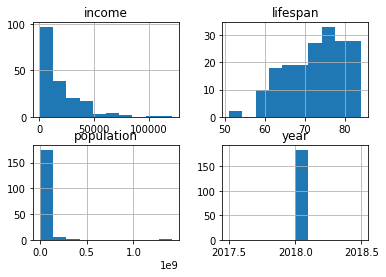

In [0]:
now.hist();

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

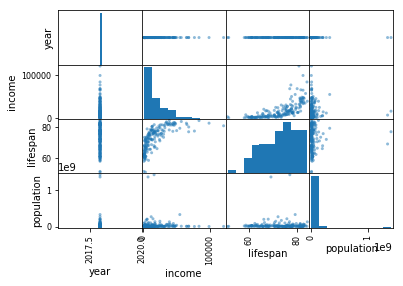

In [0]:
pd.plotting.scatter_matrix(now);

In [0]:
help(sns.relplot)

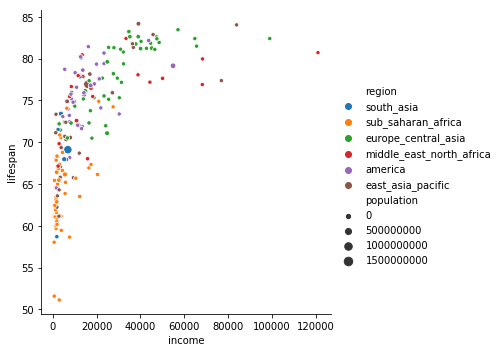

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now);

In [0]:
# Log base 10 of 100 = 2
# 10^2 = 100
# "A log is (gives you) an exponent"

In [0]:
import numpy as np

now['log_income'] = np.log(now['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
now['log_income'].describe()

count    184.000000
mean       9.170772
std        1.225316
min        6.444131
25%        8.168329
50%        9.380024
75%       10.127984
max       11.703819
Name: log_income, dtype: float64

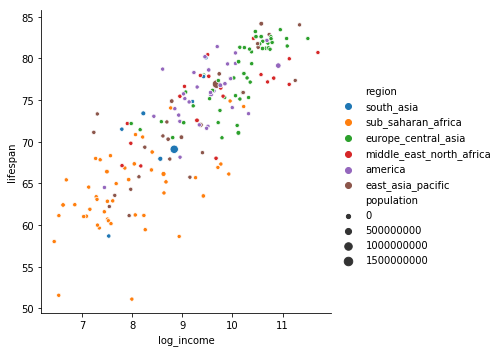

In [0]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population',
            data=now);

In [0]:
# Stretch goals/assignment - continue exploring/tweaking
# to make it more like Gapminder, or otherwise cool/informative

# Specific goals:
# Trying to make the bubble size a bit more informative/varied
# Adding annotations for countries
# Generating many frames and/or animating

## Analyze outliers

In [0]:
now[now['income'] > 80000].sort_values(by='income')

,year,income,lifespan,population,country,region,log_income
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific,11.337238
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia,11.503219
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa,11.703819


In [0]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar['income'].values[0]
qatar_lifespan = qatar['lifespan'].values[0]
print(qatar_income, qatar_lifespan)

121033 80.71


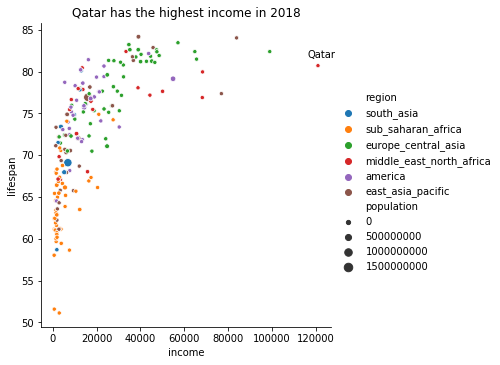

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now)

plt.text(x=qatar_income - 5000, y=qatar_lifespan + 1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

## Plot multiple years

In [0]:
years = [1818, 1918, 2018]

centuries = df[df['year'].isin(years)]
centuries.describe()

,year,income,lifespan,population,log_income
count,552.000000,552.000000,552.000000,5.520000e+02,552.000000
mean,1918.000000,6972.963768,42.402736,1.895547e+07,7.756501
std,81.723717,13745.461356,23.146963,9.202077e+07,1.340257
min,1818.000000,351.000000,1.090000,2.207000e+03,5.860786
25%,1818.000000,854.250000,25.982500,4.440450e+05,6.750223
50%,1918.000000,1476.500000,32.800000,2.167896e+06,7.297429
75%,2018.000000,5311.250000,67.110000,9.425904e+06,8.577580
max,2018.000000,121033.000000,84.170000,1.415046e+09,11.703819


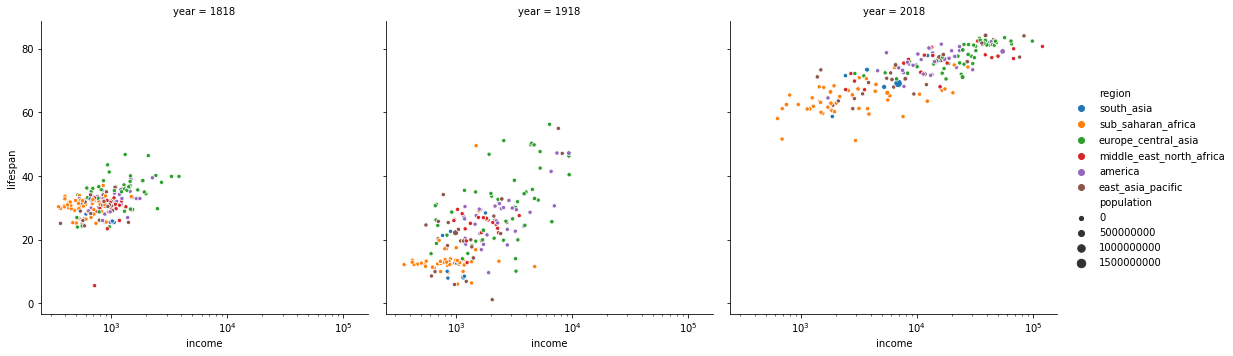

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            col='year', data=centuries)
plt.xscale('log');

## Point out a story

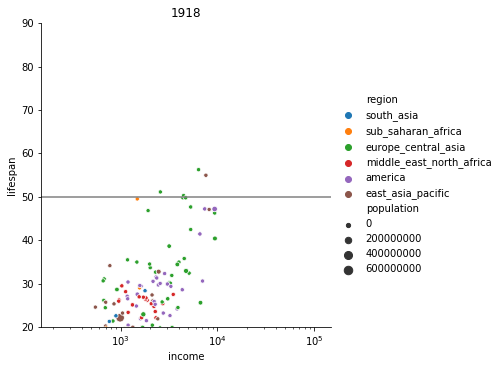

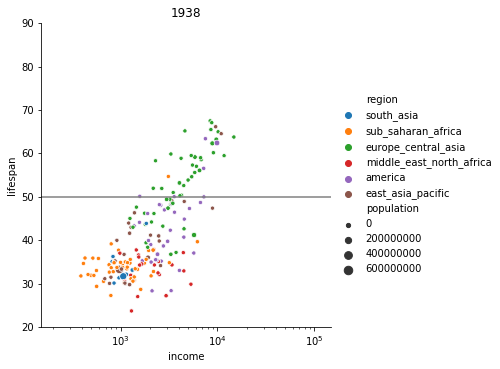

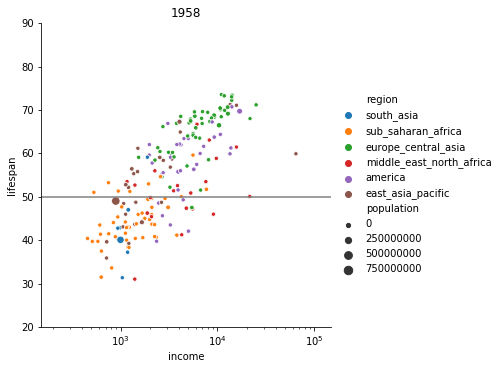

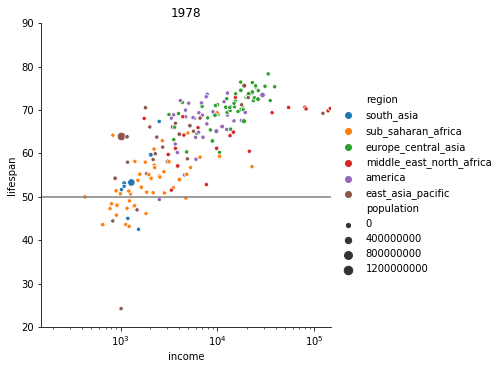

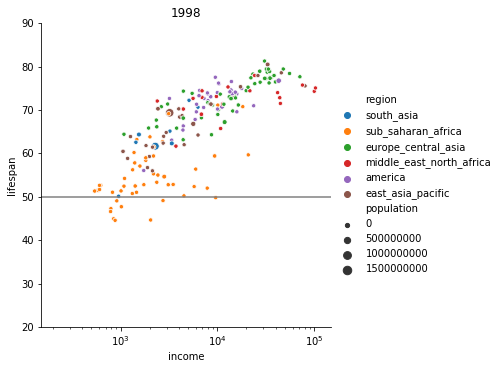

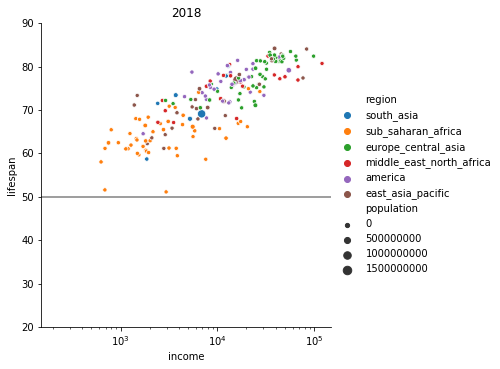

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population',
              data=df[df['year'] == year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((20, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
df = income.merge(lifespan).merge(population)

In [13]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [15]:
df.shape

(40437, 5)

In [16]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
help(pd.merge)

In [0]:
att = ['country', 'name', 'world_6region']
df = df.merge(entities[att], left_on='geo', right_on='country')

In [25]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [26]:
df.shape

(40437, 8)

In [0]:
help(df)

In [0]:
df = df.drop(columns = ['geo', 'country'])

In [17]:
df.head()

,year,income,life,population,region
0,1800,603,28.21,3280000,south_asia
1,1801,603,28.20,3280000,south_asia
2,1802,603,28.19,3280000,south_asia
3,1803,603,28.18,3280000,south_asia
4,1804,603,28.17,3280000,south_asia


In [0]:
df = df.rename(columns = {'time' : 'year',
                        'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income',
                         'life_expectancy_years' : 'life',
                         'population_total' : 'population',
                         'name' : 'country',
                         'world_6region' : 'region'})

In [27]:
df.head()

,year,income,life,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [34]:
df[df['year'] == 1935].describe()

,year,income,life,population
count,184.0,184.000000,184.000000,1.840000e+02
mean,1935.0,2704.293478,40.062446,1.164693e+07
std,0.0,2288.842505,10.239414,4.548738e+07
min,1935.0,384.000000,23.690000,2.120300e+04
25%,1935.0,1112.750000,32.815000,5.824140e+05
50%,1935.0,1892.000000,36.070000,2.307890e+06
75%,1935.0,3304.500000,45.995000,6.715799e+06
max,1935.0,13796.000000,66.610000,5.060191e+08


In [36]:
df[df['year'] == 1938].describe()

,year,income,life,population
count,184.0,184.000000,184.000000,1.840000e+02
mean,1938.0,2946.418478,41.396413,1.200344e+07
std,0.0,2580.503881,10.465787,4.651453e+07
min,1938.0,389.000000,23.700000,2.178500e+04
25%,1938.0,1168.750000,33.387500,6.358010e+05
50%,1938.0,2058.500000,37.410000,2.384403e+06
75%,1938.0,3640.250000,48.282500,6.765371e+06
max,1938.0,14797.000000,67.470000,5.140746e+08


In [37]:
df[df['year'] == 1945].describe()

,year,income,life,population
count,184.0,184.000000,184.000000,1.840000e+02
mean,1945.0,3152.586957,41.555543,1.279957e+07
std,0.0,3457.118659,10.753191,4.896025e+07
min,1945.0,402.000000,15.770000,2.320700e+04
25%,1945.0,1144.250000,33.967500,6.897158e+05
50%,1945.0,1947.000000,38.850000,2.517646e+06
75%,1945.0,3740.750000,47.230000,7.204393e+06
max,1945.0,26177.000000,68.750000,5.333731e+08


In [38]:
df[df['year'] == 1935].skew()

year          0.000000
income        1.822655
life          0.932498
population    8.717324
dtype: float64

In [28]:
df.describe(exclude = np.number)

,country,region
count,40437,40437
unique,187,6
top,Austria,europe_central_asia
freq,219,10778


In [0]:
y2000 = df[df['year'] == 2000]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2000.0, right=2000.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2000.0, top=2000.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2000.0, top=2000.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2000.0, top=2000.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc71a8518>,
      dtype=object)

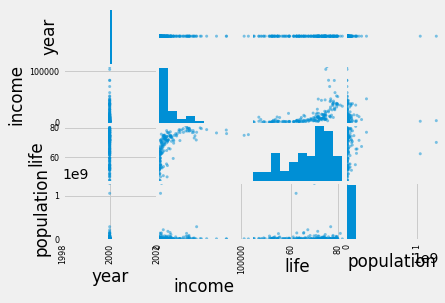

In [30]:
pd.plotting.scatter_matrix(y2000)

In [31]:
y2000.sort_values(by='income', ascending = True).values[0]

array([2000, 529, 53.37, 47076387, 'Congo, Dem. Rep.',
       'sub_saharan_africa'], dtype=object)

In [32]:
congo = y2000[y2000['country'] == 'Congo, Dem. Rep.']
congoxy = [congo['income'].values[0],congo['life'].values[0]]
congoxy

[529, 53.37]

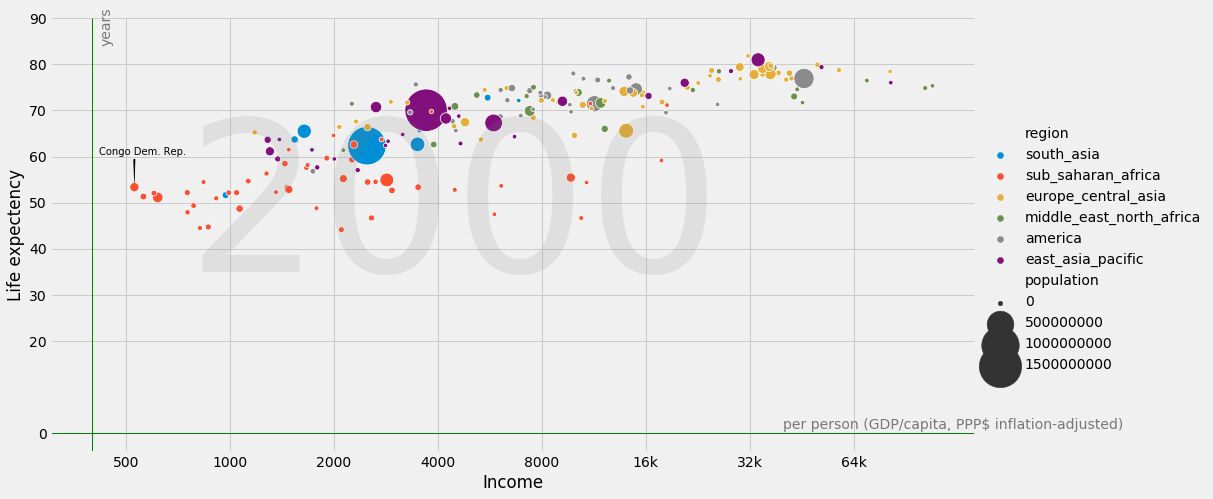

In [33]:
plt.style.use('fivethirtyeight')

ax = sns.relplot(x = 'income', y = 'life', data = y2000, hue = 'region', size = 'population', aspect = 2, height = 7
                , sizes = (20,1800))
plt.axhline(y = 0 , color = 'green', linewidth = 1, alpha = 1)
plt.axvline(x = 400 , color = 'green', linewidth = 1, alpha = 1)

plt.xscale('log')

plt.xlabel('Income')
plt.ylabel('Life expectency')
plt.text(x = 420, y = 90, alpha = 0.5, rotation = 90, s= 'years')
plt.text(x = 40000, y = 1, alpha = 0.5, s= 'per person (GDP/capita, PPP$ inflation-adjusted)')

congo = y2000[y2000['country'] == 'Congo, Dem. Rep.']
congoxy = [congo['income'].values[0],congo['life'].values[0]]
plt.text(x = congoxy[0]-110, y = congoxy[1]+7, fontsize = 10,  s = 'Congo Dem. Rep.')
plt.arrow(congoxy[0], congoxy[1]+3, 0, -2, length_includes_head=True,
          head_width=5, head_length=5, color = 'black')

plt.text(x = 750, y = 35, fontsize = 210, color = 'grey', alpha = 0.15,  s = '2000')


plt.yticks([0, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xticks([500,1000,2000, 4000,8000, 16000, 32000, 64000])
ax.set_xticklabels(labels = [ 500, '1000','2000', '4000','8000', '16k', '32k', '64k']);



In [0]:
help(plt.annotate)

In [12]:
y2000.sort_values(by='income', ascending = True).values[0]


array([2000, 529, 53.37, 47076387, 'Congo, Dem. Rep.',
       'sub_saharan_africa'], dtype=object)

In [13]:
congo = y2000[y2000['country'] == 'Congo, Dem. Rep.']
congoxy = [congo['income'].values[0],congo['life'].values[0]]
congoxy

[529, 53.37]

In [0]:
help(sns.relplot)

In [0]:
leb = df[df['country'] == 'Lebanon']

In [0]:
leb

In [45]:
years = [1870,1900,1917,1935,1942,1960,1978,1982,1990,2000,2018]

yearsleb = leb[leb['year'].isin(years)]
yearsleb.describe()

,year,income,life,population
count,11.000000,11.000000,11.000000,1.100000e+01
mean,1953.818182,6635.909091,49.412727,2.076871e+06
std,45.551769,4002.791113,20.090650,1.660971e+06
min,1870.000000,1547.000000,29.700000,4.659450e+05
25%,1926.000000,3446.500000,29.835000,8.111870e+05
50%,1960.000000,6119.000000,45.930000,1.804926e+06
75%,1986.000000,8387.000000,66.440000,2.667646e+06
max,2018.000000,13438.000000,80.450000,6.093509e+06


In [46]:
yearsleb

,year,income,life,population,country,region
20531,1870,1547,29.70,465945,Lebanon,middle_east_north_africa
20561,1900,2086,29.77,558482,Lebanon,middle_east_north_africa
20578,1917,2111,29.81,655346,Lebanon,middle_east_north_africa
20596,1935,4782,29.86,967028,Lebanon,middle_east_north_africa
20603,1942,6119,35.89,1124817,Lebanon,middle_east_north_africa
20621,1960,8914,63.73,1804926,Lebanon,middle_east_north_africa
20639,1978,7702,52.80,2604865,Lebanon,middle_east_north_africa
20643,1982,5900,45.93,2632276,Lebanon,middle_east_north_africa
20651,1990,7860,69.15,2703016,Lebanon,middle_east_north_africa
20661,2000,12536,76.45,3235366,Lebanon,middle_east_north_africa


[]

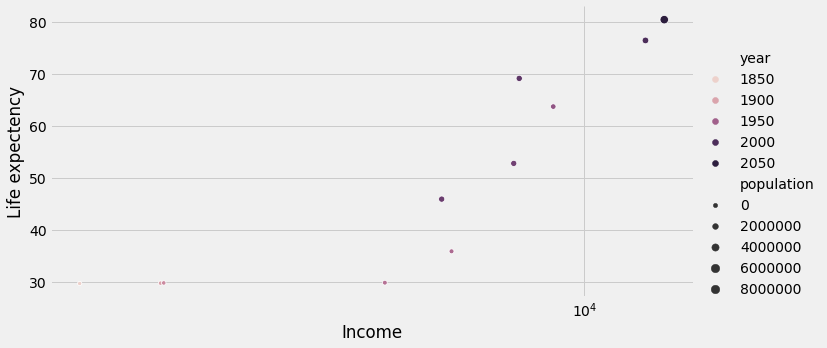

In [48]:
ax = sns.relplot(x='income', y='life', size='population', data=yearsleb, hue = 'year', aspect = 2)

plt.xscale('log')

plt.xlabel('Income')
plt.ylabel('Life expectency')


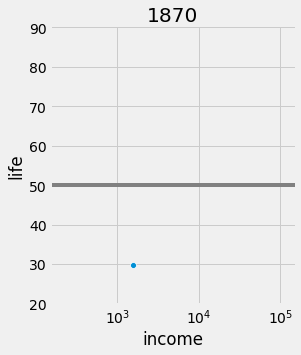

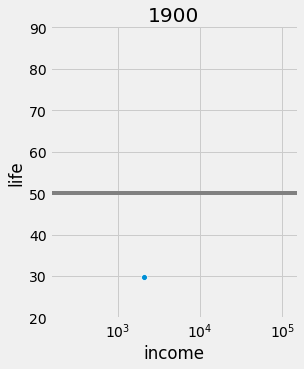

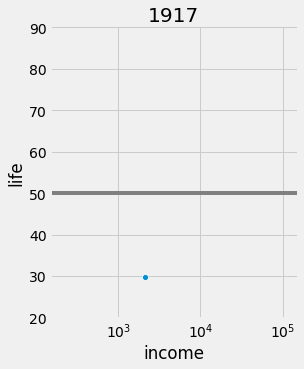

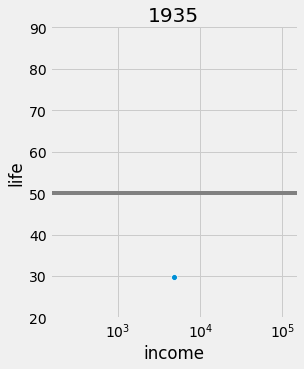

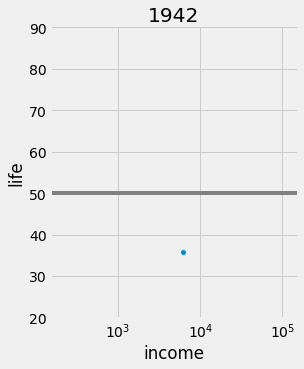

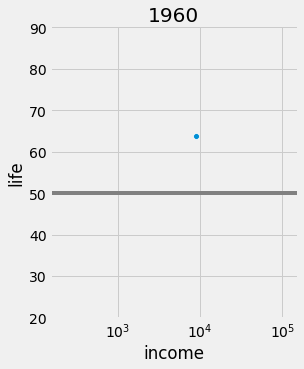

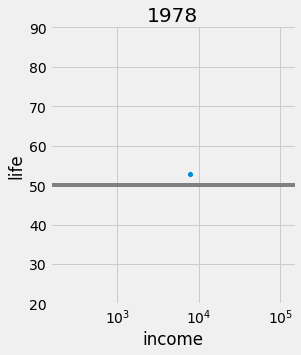

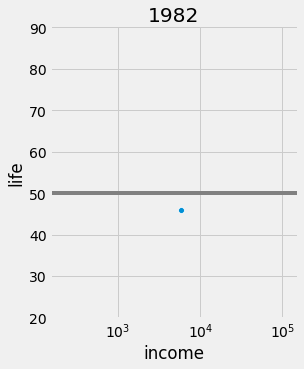

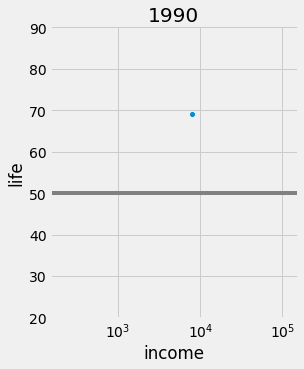

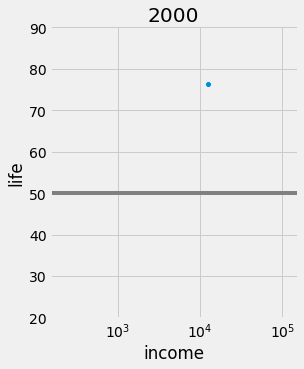

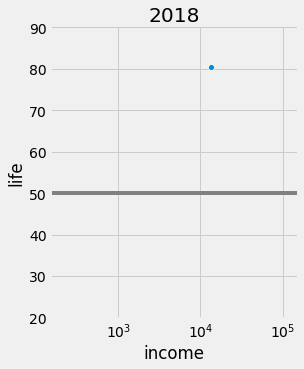

In [50]:
# Effects of ww1 and 2, and thn the effects of a civil war and the boom after the war in 1990.
for year in years:
  sns.relplot(x='income', y='life',
              data=leb[leb['year'] == year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((20, 90))
  plt.title(year)
  plt.axhline(y=50, color='grey')

In [28]:
!pip install pillow

In [0]:
import matplotlib.animation as animation

In [0]:
# Everything below is just me testing things, nothing to see lol

In [0]:
# Copied from Derek, still not sure how to save the png into a gif, will figure it out.
# def plot_save():
#   for plot in plots:
#     x = 1
#     filename = (f"{x}snsplot.png")
#     fig = plt.get_figure()
#     fig.savefig(filename)
#     x += 1
# plt.tight_layout()
# plt.style.use(['dark_background'])
# years = list(range(1818, 2019,10))
# size = (df['population']*14)**10
# colors = sns.color_palette("CMRmap", n_colors=219, desat=.6)
#   #  
# for year in years:
  
#   sns.relplot(x='income', y='lifespan',cmap=colors, hue='country', 
#         size=size,
#         data=df[df['year'] == year], legend=False)
#   plt.grid(b=True, which='major', axis='both', color='grey', linestyle='-', linewidth=.5)
#   plt.title(year, style='oblique')
#   plt.axhline(y=50, color='grey');
#   plt.xlim((400, 140000))
#   plt.ylim((32, 90))
#   #save plot per element
#   plt.savefig(f"{year}.png")
# plt.xscale('log')
  
  
 

  
# plt.xscale('log')


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


NameError: ignored

<Figure size 432x288 with 0 Axes>

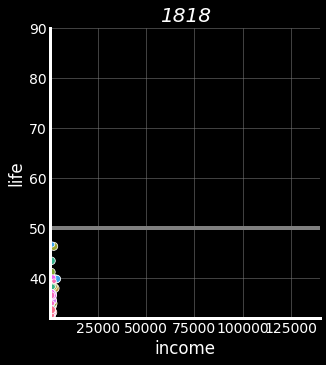

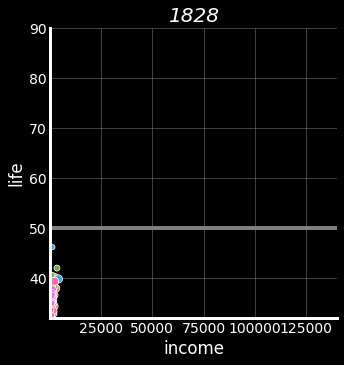

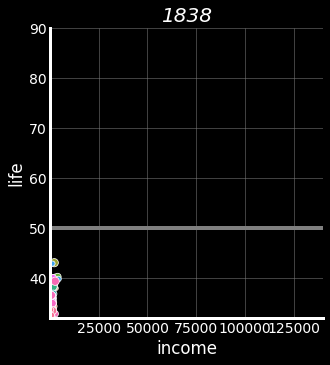

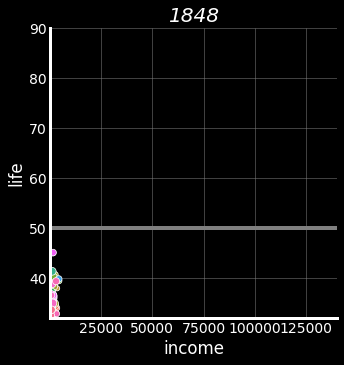

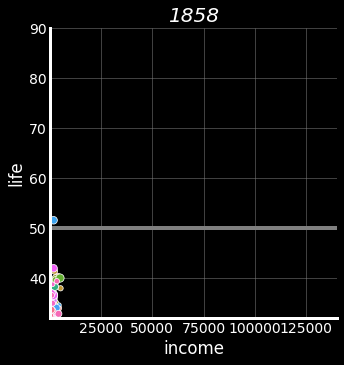

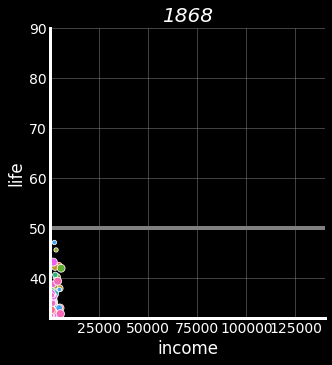

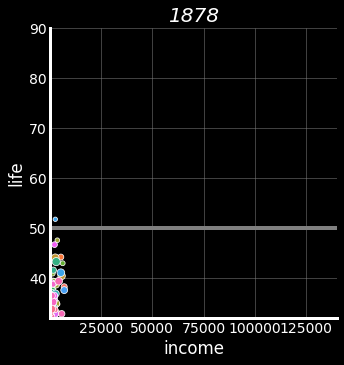

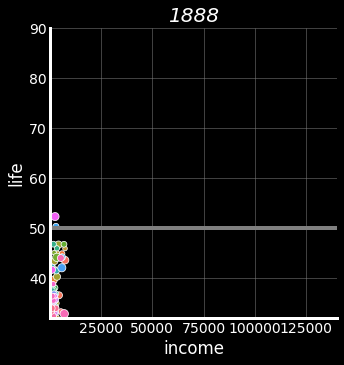

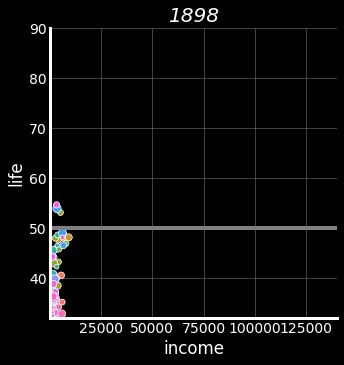

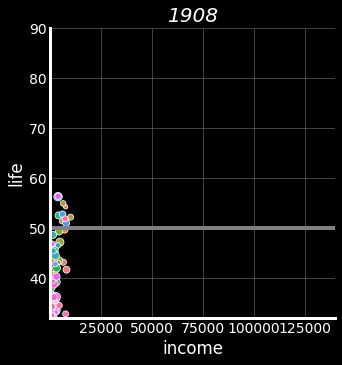

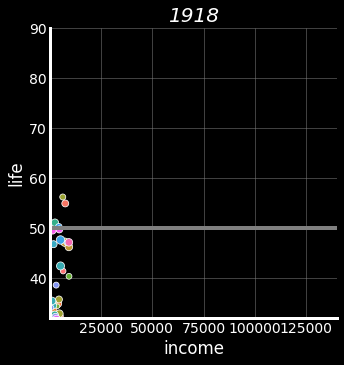

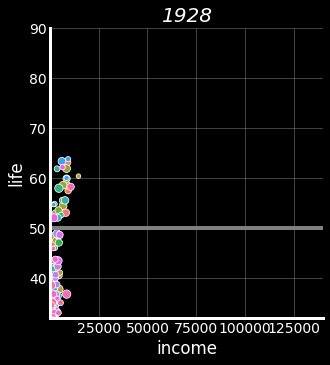

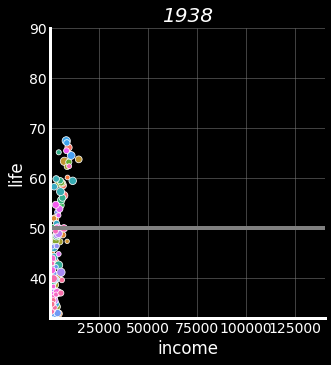

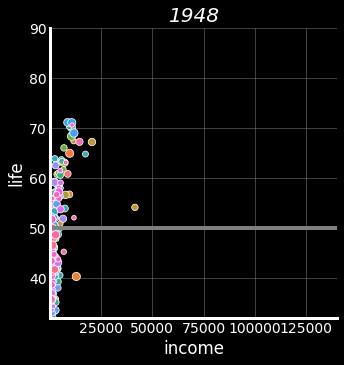

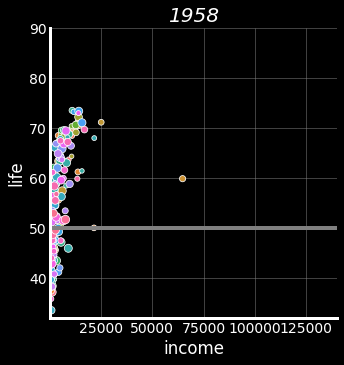

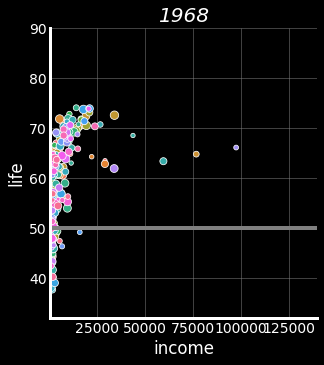

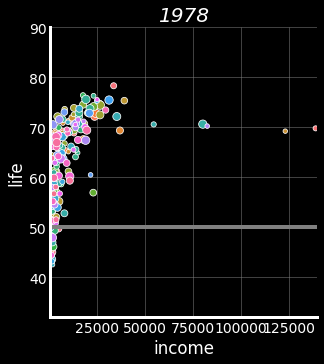

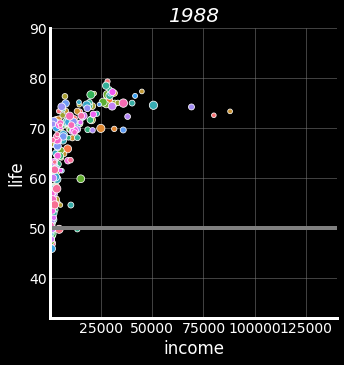

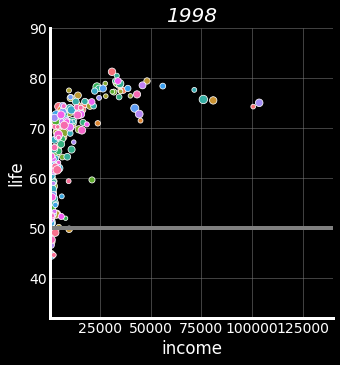

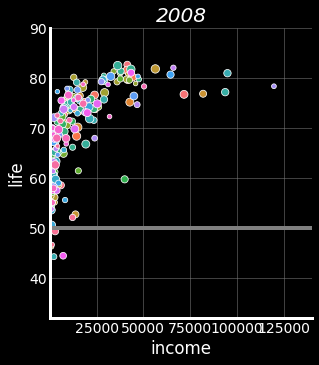

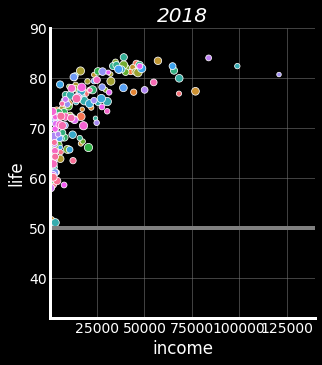

In [54]:
plot_save(df)

In [0]:
help(sns.relplot)

In [0]:
import matplotlib.animation as animation
import matplotlib

In [0]:
%matplotlib notebook

In [0]:
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [0]:
title = 'test'

x = np.array(leb['income'])
y = np.array(leb['life'])

#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)


In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [263]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(leb['life']), np.max(leb['life']))
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
def animate(i):
    data = leb.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [0]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

plt.show()

In [0]:
plt.show()

In [0]:
class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt

In [266]:
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
particles, = ax.plot([], [], 'bo', ms=6)

In [268]:
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

NameError: ignored